##Check the information format in the csv table

In [4]:
import pandas as pd

# The only thing that needs to be changed when using it. 
# Please change the path below to the path of your current csv file
#All of the following need to be modified
csv_file_path = r"C:\Users\zouxu\OneDrive\Desktop\Second Semester\CS506\Spark\data\2013income.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Display the contents of the DataFrame
print(df)


                                     Label (Grouping)  \
0          Population 16 years and over with earnings   
1                           Median earnings (dollars)   
2         Full-time, year-round workers with earnings   
3                                $1 to $9,999 or loss   
4                                  $10,000 to $14,999   
5                                  $15,000 to $24,999   
6                                  $25,000 to $34,999   
7                                  $35,000 to $49,999   
8                                  $50,000 to $64,999   
9                                  $65,000 to $74,999   
10                                 $75,000 to $99,999   
11                                   $100,000 or more   
12                          Median earnings (dollars)   
13                            Mean earnings (dollars)   
14          MEDIAN EARNINGS BY EDUCATIONAL ATTAINMENT   
15         Population 25 years and over with earnings   
16                     Less tha

##Extract information from a table

In [5]:
import pandas as pd

# Replace this with the path to your CSV file
csv_file_path = r"C:\Users\zouxu\OneDrive\Desktop\Second Semester\CS506\Spark\data\2019income.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Extract Median Earnings and Mean Earnings
median_earnings = df.at[1, "Boston city, Massachusetts!!Total!!Estimate"]
mean_earnings = df.at[13, "Boston city, Massachusetts!!Total!!Estimate"]

print("Median Earnings:", median_earnings)
print("Mean Earnings:", mean_earnings)


Median Earnings: 45,046
Mean Earnings: 87,885


##Extract information from all data tables

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of years for which you have CSV files
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021]

# Base file path - replace this with the path to your CSV files, excluding the year and file extension
base_file_path = r"C:\Users\zouxu\OneDrive\Desktop\Second Semester\CS506\Spark\data\{}income.csv"

# Initialize an empty dictionary to store median and mean earnings for each year
earnings_data = {}

# Loop through each year, read the corresponding CSV file, and extract median and mean earnings
for year in years:
    # Format the file path with the current year
    csv_file_path = base_file_path.format(year)

    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    # Extract Median Earnings and Mean Earnings
    median_earnings = df.at[1, "Boston city, Massachusetts!!Total!!Estimate"]
    mean_earnings = df.at[13, "Boston city, Massachusetts!!Total!!Estimate"]

    # Store the extracted data in the dictionary
    earnings_data[year] = {"median": median_earnings, "mean": mean_earnings}

# Print the extracted data
for year, data in earnings_data.items():
    print(f"Year: {year}")
    print("Median Earnings:", data["median"])
    print("Mean Earnings:", data["mean"])
    print()


Year: 2013
Median Earnings: 32,142
Mean Earnings: 70,418

Year: 2014
Median Earnings: 35,273
Mean Earnings: 74,406

Year: 2015
Median Earnings: 36,059
Mean Earnings: 73,968

Year: 2016
Median Earnings: 37,323
Mean Earnings: 77,240

Year: 2017
Median Earnings: 38,884
Mean Earnings: 79,642

Year: 2018
Median Earnings: 41,125
Mean Earnings: 83,904

Year: 2019
Median Earnings: 45,046
Mean Earnings: 87,885

Year: 2021
Median Earnings: 49,039
Mean Earnings: 99,604



##Generate table from all data

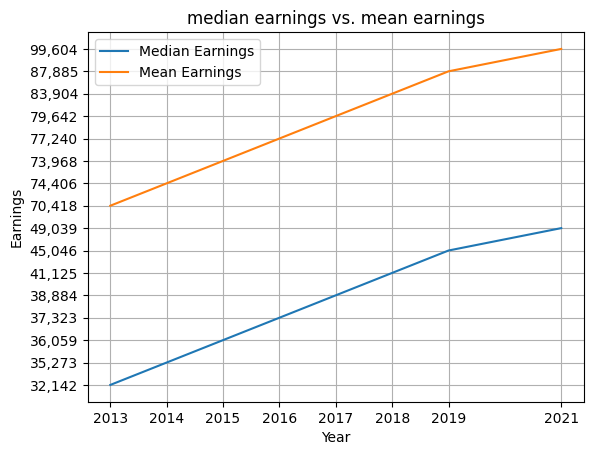

In [9]:
# Create lists for median earnings and mean earnings
median_earnings_list = [data["median"] for data in earnings_data.values()]
mean_earnings_list = [data["mean"] for data in earnings_data.values()]

# Create the plot
plt.plot(years, median_earnings_list, label="Median Earnings")
plt.plot(years, mean_earnings_list, label="Mean Earnings")

# Customize the plot
plt.title("median earnings vs. mean earnings")
plt.xlabel("Year")
plt.ylabel("Earnings")
plt.legend()
plt.grid()

# Remove 2020 from the x-axis
plt.xticks([year for year in years if year != 2020])

# Show the plot
plt.show()


## Standardized  results

The standardized results are indeed different from the original results. Standardization is a preprocessing technique that adjusts the scale of a dataset so that each feature has a mean of 0 and a variance of 1. This method can help us more easily compare features of different scales and, in some cases, make machine learning algorithms work more effectively. However, this also means that the standardized data may no longer have the same original units and range.

In this example, we have standardized the earnings data, so the vertical axis (standardized earnings) now represents the number of standard deviations that the original earnings data is from the average earnings of the entire dataset. This is the reason why the standardized results are different from the original results. The purpose here is to help you more easily observe the relative changes in the data, rather than focusing on the absolute values of the original earnings.

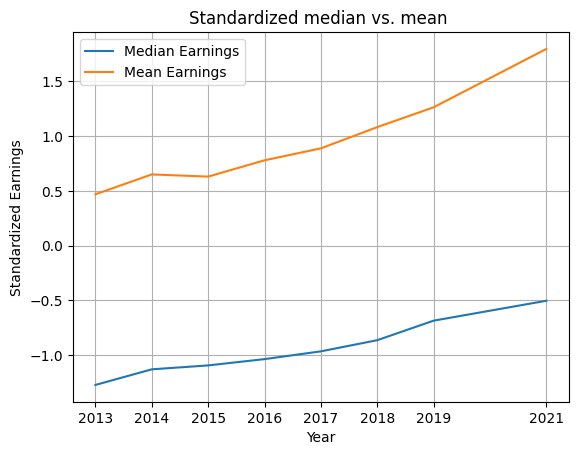

In [13]:
from sklearn.preprocessing import StandardScaler

# Create lists for median earnings and mean earnings
median_earnings_list = [float(data["median"].replace(',', '')) for data in earnings_data.values()]
mean_earnings_list = [float(data["mean"].replace(',', '')) for data in earnings_data.values()]

# Combine the lists and reshape for standardization
earnings_array = median_earnings_list + mean_earnings_list
earnings_array = np.array(earnings_array).reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
standardized_earnings = scaler.fit_transform(earnings_array)

# Separate the standardized data
standardized_median_earnings = standardized_earnings[:len(median_earnings_list)]
standardized_mean_earnings = standardized_earnings[len(median_earnings_list):]

# Create the plot
plt.plot(years, standardized_median_earnings, label="Median Earnings")
plt.plot(years, standardized_mean_earnings, label="Mean Earnings")

# Customize the plot
plt.title("Standardized median vs. mean ")
plt.xlabel("Year")
plt.ylabel("Standardized Earnings")
plt.legend()
plt.grid()

# Remove 2020 from the x-axis
plt.xticks([year for year in years if year != 2020])

# Show the plot
plt.show()
